**I put comments after some graphs (findings), those graphs are in the presentation, otherwise, all findings comments are before it**

# Movies Dataset 
**You find Dataset that I used in this [Link](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv), I used Movies meta data file**

# Dataset Overview
       Movies Dataset consist of 24 columns and 45466 rows but I worked with 17 column only and I end up working with 31K rows, then I worked with more than 20K rows with genres (Drama, Action, Comedy, Horror), At the end I worked with Arabic movies only for my interest but it's a pretty small subset but it was so exciting to me.


## Dataset Question:
- What are the most correlated features?
- What is the most frequent language?
- What is the most frequent status of Movies?
- What are the features distributions?
- Is there a correlation between revenue and budget and profit?
- What is the trend of budget, revenue and profit?
- What is the most productive country to movies?
- What is the top 10 countries with production companies?
- What is the genre of movies with the highest median vote average, and in which status?

### Arabic Movies Questions:
- What is the highest vote average in Arabic movies, What is its genre?
- What is the highest vote count in Arabic movies, What is its genre?


In [1]:
import nbconvert

In [2]:
import dexplot as dxp

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [4]:
df=pd.read_csv('movies_metadata.csv')
df.head()

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.shape

(45466, 24)

# Data Exploration and Cleaning 

In [6]:
df.shape

(45466, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
#Keep the 1st genre only, it's the most indicator the movie genre
df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [9]:
df['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [10]:
df['spoken_languages']

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [11]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [12]:
# adult Values isn't useful at all, I think I will drop all values that is not (False, True)
print(df['adult'].unique())

['False' 'True' ' - Written by Ørnås'
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']


In [13]:
#Status values, ==> 6 values
df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [14]:
#Will drop nan valeus
df.video.unique()

array([False, True, nan], dtype=object)

In [15]:
# needs to be changed to integer.
df.popularity.describe()

count     45461
unique    44176
top         0.0
freq         34
Name: popularity, dtype: object

In [16]:
#Extract companies names
df.production_companies.unique()

array(["[{'name': 'Pixar Animation Studios', 'id': 3}]",
       "[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]",
       "[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]",
       ...,
       "[{'name': 'Westdeutscher Rundfunk (WDR)', 'id': 7025}, {'name': 'Working Title Films', 'id': 10163}, {'name': '20th Century Fox Television', 'id': 16323}, {'name': 'CanWest Global Communications', 'id': 38978}]",
       "[{'name': 'Sine Olivia', 'id': 19653}]",
       "[{'name': 'Yermoliev', 'id': 88753}]"], dtype=object)

In [17]:
#Will Extract countries names
df.production_countries.unique()

array(["[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       ...,
       "[{'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'SK', 'name': 'Slovakia'}]",
       "[{'iso_3166_1': 'CU', 'name': 'Cuba'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]",
       "[{'iso_3166_1': 'EG', 'name': 'Egypt'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"],
      dtype=object)

In [18]:
print(df[['id','imdb_id','title','original_title','original_language','spoken_languages']].nunique())

id                   45436
imdb_id              45417
title                42277
original_title       43373
original_language       92
spoken_languages      1931
dtype: int64


In [19]:
# Droping useless columns -> 7 cols 
df=df.drop(['belongs_to_collection','homepage','overview','title','imdb_id','tagline','poster_path'],axis=1)
print(df.shape)
df.head()

(45466, 17)


,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0


In [20]:
df=df.dropna()
df.shape

(45043, 17)

### Data Cleaning
    1-Extract production_countries name (only 1st name of the countries)
    2-Extract production_companies name (only 1st name of the companies)
    3-Extract spoken_languages name (only 1st name of the languages as it's the most important)
    4-Extract genres name (only 1st name of the genres as it's the best indicator of the movie genre)

In [21]:
# production_countries
# Get production_countries names
df['production_countries']=df.loc[df['production_countries'].notna(), 'production_countries'].str.split("'name': ").str[1].str.split("'").str[1]

# production_companies
df['production_companies']=df.loc[df['production_companies'].notna(), 'production_companies'].str.split("'name': ").str[1].str.split("'").str[1]

#spoken_languages
df['spoken_languages']=df.loc[df['spoken_languages'].notna(), 'spoken_languages'].str.split("'name': ").str[1].str.split("'").str[1]

#genres
df['genres']=df.loc[df['genres'].notna(), 'genres'].str.split("'name': ").str[1].str.split("'").str[1]

df.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,Animation,862,en,Toy Story,21.9469,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,False,7.7,5415.0
1,False,65000000,Adventure,8844,en,Jumanji,17.0155,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,False,6.9,2413.0
2,False,0,Romance,15602,en,Grumpier Old Men,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
3,False,16000000,Comedy,31357,en,Waiting to Exhale,3.85949,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,False,6.1,34.0
4,False,0,Comedy,11862,en,Father of the Bride Part II,8.38752,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,False,5.7,173.0


### Transfer release_date from object to Datetime

In [22]:
# release_date
# Transfer release_date from object to datetime
df['release_date']=pd.to_datetime(df['release_date'])
df.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,Animation,862,en,Toy Story,21.9469,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,False,7.7,5415.0
1,False,65000000,Adventure,8844,en,Jumanji,17.0155,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,False,6.9,2413.0
2,False,0,Romance,15602,en,Grumpier Old Men,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
3,False,16000000,Comedy,31357,en,Waiting to Exhale,3.85949,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,False,6.1,34.0
4,False,0,Comedy,11862,en,Father of the Bride Part II,8.38752,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,False,5.7,173.0


In [23]:
#Note that release_data has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45043 non-null  object        
 1   budget                45043 non-null  object        
 2   genres                42756 non-null  object        
 3   id                    45043 non-null  object        
 4   original_language     45043 non-null  object        
 5   original_title        45043 non-null  object        
 6   popularity            45043 non-null  object        
 7   production_companies  33478 non-null  object        
 8   production_countries  38979 non-null  object        
 9   release_date          45043 non-null  datetime64[ns]
 10  revenue               45043 non-null  float64       
 11  runtime               45043 non-null  float64       
 12  spoken_languages      41414 non-null  object        
 13  status          

### Transfering Data Types 
    1-id (object -> int)
    2-popularity (object -> float)
    3-budget (object -> float)

In [24]:
# I think it's not necessary to tranfer id from object to int.
df['id']=df['id'].astype(str).astype(int)
df[['popularity','budget']]=df[['popularity','budget']].astype(str).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45043 non-null  object        
 1   budget                45043 non-null  float64       
 2   genres                42756 non-null  object        
 3   id                    45043 non-null  int32         
 4   original_language     45043 non-null  object        
 5   original_title        45043 non-null  object        
 6   popularity            45043 non-null  float64       
 7   production_companies  33478 non-null  object        
 8   production_countries  38979 non-null  object        
 9   release_date          45043 non-null  datetime64[ns]
 10  revenue               45043 non-null  float64       
 11  runtime               45043 non-null  float64       
 12  spoken_languages      41414 non-null  object        
 13  status          

**Droping duplicates in id columns**

In [25]:
df=df.drop_duplicates('id')

In [26]:
df.shape

(45013, 17)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45013 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45013 non-null  object        
 1   budget                45013 non-null  float64       
 2   genres                42726 non-null  object        
 3   id                    45013 non-null  int32         
 4   original_language     45013 non-null  object        
 5   original_title        45013 non-null  object        
 6   popularity            45013 non-null  float64       
 7   production_companies  33455 non-null  object        
 8   production_countries  38952 non-null  object        
 9   release_date          45013 non-null  datetime64[ns]
 10  revenue               45013 non-null  float64       
 11  runtime               45013 non-null  float64       
 12  spoken_languages      41386 non-null  object        
 13  status          

**Seems like spoken_languages column is a lil bit messy**

In [28]:
# It has noisy data and un-understandable data
print(df.spoken_languages.nunique())
df.spoken_languages.unique()

73


array(['English', 'Français', '广州话 / 廣州話', '普通话', 'Pусский', 'Español',
       nan, 'shqip', 'Italiano', 'Deutsch', 'فارسی', 'Nederlands',
       'Dansk', 'العربية', 'Magyar', '', 'Český', 'svenska', '日本語',
       'Português', 'Català', '한국어/조선말', 'Afrikaans', 'বাংলা', 'עִבְרִית',
       'Latin', 'Cymraeg', 'Tiếng Việt', 'Polski', 'български език',
       'ελληνικά', 'Norsk', 'Bosanski', 'Gaeilge', 'Bokmål',
       'Український', 'No Language', 'Kiswahili', 'Srpski', 'हिन्दी',
       'Azərbaycan', 'ภาษาไทย', 'Bamanankan', 'suomi', 'Română',
       'Hrvatski', 'Türkçe', 'ქართული', 'Slovenčina', 'беларуская мова',
       'Esperanto', 'Galego', 'Íslenska', 'isiZulu', 'Eesti', 'Latviešu',
       'қазақ', 'Slovenščina', 'Bahasa indonesia', 'Wolof', 'اردو',
       'Kinyarwanda', 'euskera', 'Bahasa melayu', 'தமிழ்', 'తెలుగు',
       'Lietuvi\\x9akai', '?????', '??????', 'پښتو', 'ਪੰਜਾਬੀ', 'Somali',
       'Hausa', 'Fulfulde'], dtype=object)

**original_language column is a bit organized and I will continue working with it**

In [29]:
# I GUESS I will work with original_language column.
print(df.original_language.nunique())
df.original_language.unique()

89


array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay', 'kn',
       'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu', 'lb',
       'si'], dtype=object)

In [30]:
# Droping nan after cleaning
df=df.dropna()
df.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000.0,Animation,862,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,False,7.7,5415.0
1,False,65000000.0,Adventure,8844,en,Jumanji,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,False,6.9,2413.0
2,False,0.0,Romance,15602,en,Grumpier Old Men,11.712900,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
3,False,16000000.0,Comedy,31357,en,Waiting to Exhale,3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,False,6.1,34.0
4,False,0.0,Comedy,11862,en,Father of the Bride Part II,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,False,5.7,173.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31990 entries, 0 to 45463
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 31990 non-null  object        
 1   budget                31990 non-null  float64       
 2   genres                31990 non-null  object        
 3   id                    31990 non-null  int32         
 4   original_language     31990 non-null  object        
 5   original_title        31990 non-null  object        
 6   popularity            31990 non-null  float64       
 7   production_companies  31990 non-null  object        
 8   production_countries  31990 non-null  object        
 9   release_date          31990 non-null  datetime64[ns]
 10  revenue               31990 non-null  float64       
 11  runtime               31990 non-null  float64       
 12  spoken_languages      31990 non-null  object        
 13  status          

In [32]:
print(df.genres.nunique())
df.genres.unique()

20


array(['Animation', 'Adventure', 'Romance', 'Comedy', 'Action', 'Family',
       'History', 'Drama', 'Crime', 'Fantasy', 'Science Fiction', 'Music',
       'Horror', 'Documentary', 'Mystery', 'Thriller', 'Western', 'War',
       'TV Movie', 'Foreign'], dtype=object)

In [33]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.095861,0.435606,0.766689,0.159191,0.066755,0.671215
id,-0.095861,1.000000,-0.051652,-0.066822,-0.097464,-0.125983,-0.054252
popularity,0.435606,-0.051652,1.000000,0.500894,0.126823,0.144590,0.552231
revenue,0.766689,-0.066822,0.500894,1.000000,0.124737,0.091813,0.809647
runtime,0.159191,-0.097464,0.126823,0.124737,1.000000,0.153462,0.133413
vote_average,0.066755,-0.125983,0.144590,0.091813,0.153462,1.000000,0.140419
vote_count,0.671215,-0.054252,0.552231,0.809647,0.133413,0.140419,1.000000


# Data Visualization Part 

#  What are the most correlated features?

Text(0.5, 1.0, 'Correlatino Between Featuers')

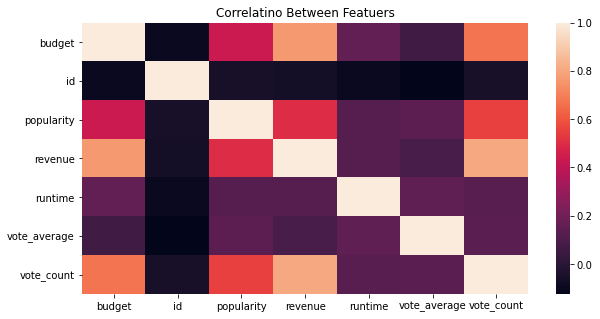

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr());
plt.title("Correlatino Between Featuers")

### Correlation between Features.

  - budget and revenue =0.76

  - budget and vote_count 0.67

  - popularity and revenue = 0.5

  - popularity and vote_count = 0.55

  - revenue and vote_count =0.8
   

In [35]:
languages=df.original_language.value_counts().iloc[:10]
languages.index

Index(['en', 'fr', 'ja', 'it', 'de', 'es', 'ru', 'hi', 'ko', 'sv'], dtype='object')

# What is the most frequent Movies Status (Released,Rumored,...)?

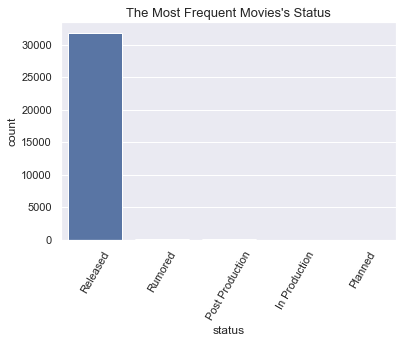

In [131]:
# Plotting Movies status, and Movies original languages.
#fig, ax = plt.subplots(ncols=2, figsize = [15,8])

default_color = sns.color_palette()[0]
#sns.yticks(np.arange(500,10000+500,500))
status_bins=np.arange(df.status.value_counts().min(), df.status.value_counts().max()+50,50)
plt.title("The Most Frequent Movies's Status",fontsize=13)
plt.xticks(rotation=60)
sns.countplot(data = df, x = 'status', color = default_color);


# What is the Top 10 Frequent Languages in Movies?

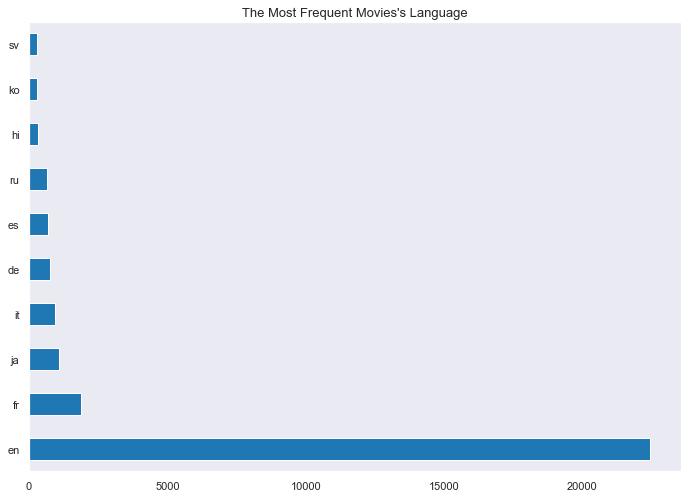

In [126]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title("The Most Frequent Movies's Language",fontsize=13)
languages.plot(kind='barh',color = default_color);

In [127]:
df.vote_average.describe()

count    31990.000000
mean         5.846746
std          1.587855
min          0.000000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

## Vote_Avetage Distribution.
**Vote_average is normally distributed but there's approximately 1000 vote_average ==0, It might be sth wrong in the data, or missing values in the original data that replaced with 0**

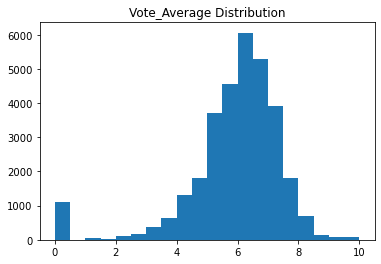

In [39]:
vote_avg_bins=np.arange(0,10+0.5,0.5)
plt.hist(data=df, x='vote_average',bins=vote_avg_bins);
plt.title('Vote_Average Distribution');

In [40]:
df.popularity.describe()

count    31990.000000
mean         3.784131
std          6.917325
min          0.000000
25%          0.660899
50%          1.768506
75%          5.518635
max        547.488298
Name: popularity, dtype: float64

In [41]:
df[df.popularity ==df.popularity.max()]

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
30700,False,74000000.0,Family,211672,en,Minions,547.488298,Universal Pictures,United States of America,2015-06-17,1.156731e+09,91.0,English,Released,False,6.4,4729.0


# What is Popularity Distribution?

**I think popularity needs transformation**

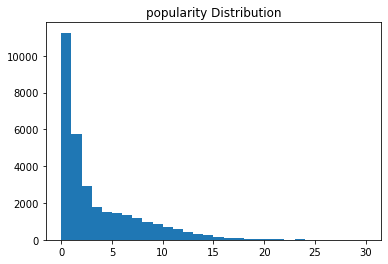

In [42]:
popularity_bins=np.arange(0,30+1,1)
plt.hist(data=df, x='popularity',bins=popularity_bins);
plt.title('popularity Distribution');

**After transformation**

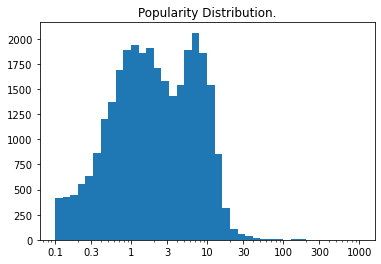

In [43]:
popularity_bins=10 ** np.arange(-1,3 +0.1, 0.1)
popularity_ticks=[0.1,0.3,1,3,10,30,100,300,1000]
labels=['{}'.format( v) for v in popularity_ticks]
plt.hist(data=df, x='popularity', bins=popularity_bins);
plt.xscale('log')
plt.xticks(popularity_ticks, labels);
plt.title('Popularity Distribution.');

In [44]:
# Dropping rows with budget and revenue equal to zero. 
#df.drop(df.query("budget== budget.min()  and revenue==revenue.min()").index, inplace = True) 


In [45]:
# Checking
df.query("budget== budget.min() and revenue==revenue.min()")

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
2,False,0.0,Romance,15602,en,Grumpier Old Men,11.712900,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
7,False,0.0,Action,45325,en,Tom and Huck,2.561161,Walt Disney Pictures,United States of America,1995-12-22,0.0,97.0,English,Released,False,5.4,45.0
11,False,0.0,Comedy,12110,en,Dracula: Dead and Loving It,5.430331,Columbia Pictures,France,1995-12-22,0.0,88.0,English,Released,False,5.7,210.0
21,False,0.0,Drama,1710,en,Copycat,10.701801,Regency Enterprises,United States of America,1995-10-27,0.0,124.0,English,Released,False,6.5,199.0
23,False,0.0,Drama,12665,en,Powder,12.133094,Caravan Pictures,United States of America,1995-10-27,0.0,111.0,English,Released,False,6.3,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,False,0.0,Horror,289923,en,The Burkittsville 7,0.386450,Neptune Salad Entertainment,United States of America,2000-10-03,0.0,30.0,English,Released,False,7.0,1.0
45459,False,0.0,Science Fiction,222848,en,Caged Heat 3000,0.661558,Concorde-New Horizons,United States of America,1995-01-01,0.0,85.0,English,Released,False,3.5,1.0
45460,False,0.0,Drama,30840,en,Robin Hood,5.683753,Westdeutscher Rundfunk (WDR),Canada,1991-05-13,0.0,104.0,English,Released,False,5.7,26.0
45462,False,0.0,Drama,111109,tl,Siglo ng Pagluluwal,0.178241,Sine Olivia,Philippines,2011-11-17,0.0,360.0,,Released,False,9.0,3.0


# What is the top 10 countries with the highest count of production companies?

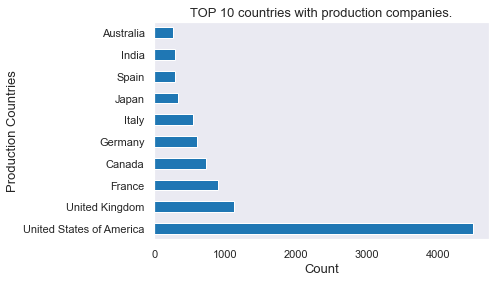

In [123]:
df.groupby('production_countries').production_companies.nunique().sort_values(ascending=False).to_frame('count').iloc[:10] .plot(kind='barh');
plt.xlabel("Count",fontsize=13)
plt.ylabel("Production Countries",fontsize=13)
plt.title('TOP 10 countries with production companies.',fontsize=13);

plt.legend().remove();

## TOP 10 countries with production companies.
**United states of America has the highest number of production companies with more than 4000 companies, United Kingdom came in the second place with more than 1000 companies.**

# What is the most productive country of movies?

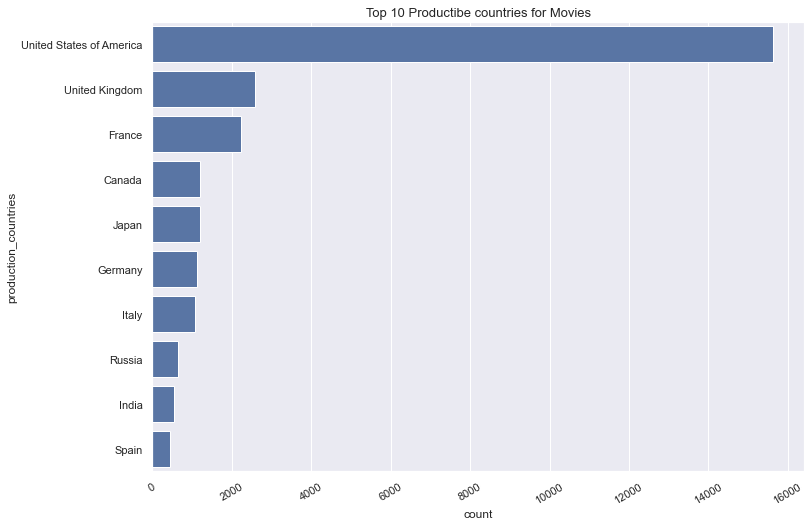

In [118]:
plt.figure(figsize=[ 11.69, 8.27])
base_color = sns.color_palette()[0]
ax=sns.countplot(data=df, y='production_countries', 
              color=base_color,
              order=df.production_countries.value_counts().iloc[:10].index,
              #hue=df.genres.value_counts().iloc[:3]
                );
plt.xticks(rotation=30);
plt.title("Top 10 Productibe countries for Movies",fontsize=13);

### Top 10 Production Countries for Movies.
**The highest productive country for movies is United states of America with more than 14k, then United kingdom with more than 2000**

   Japan is the fifth productive country to movies in this dataset but it's in the seventh place in the number of production companies, while Spain is the tenth productive country to movies in this dataset but it's the eighth place in the number production companies.
   
   seems like number of production companies in each country is not a big indicator of the country movies production in some cases.

In [48]:
df.vote_average.describe()

count    31990.000000
mean         5.846746
std          1.587855
min          0.000000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [49]:
df.release_date.describe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   31990
unique                  14907
top       2008-01-01 00:00:00
freq                       58
first     1878-06-14 00:00:00
last      2020-12-16 00:00:00
Name: release_date, dtype: object

# What is the vote average among years (1950-2018)?

In [50]:
df['years'] = df['release_date'].apply(lambda x: x.year)
df['profit'] = df['revenue'] - df['budget']

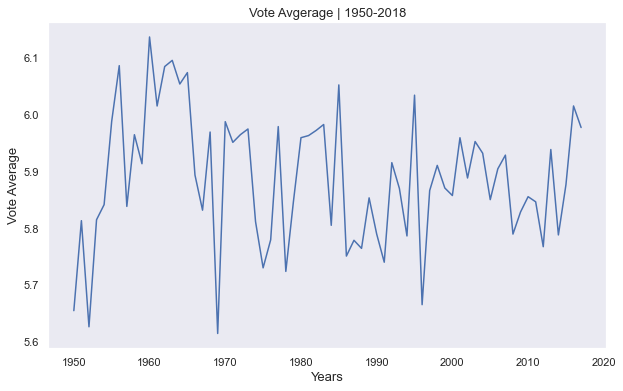

In [117]:
plt.figure(figsize=(10,6))
df[(df['years'] < 2018) & (df['years'] >= 1950)].groupby(by = 'years').mean()['vote_average'].plot();
plt.ylabel("Vote Average",fontsize=13)
plt.xlabel("Years",fontsize=13)

plt.title("Vote Avgerage | 1950-2018",fontsize=13);

## Vote Average in (1950-2018)
**Notice the highest vote average was around 1960 and the lowest was before 1970**

in the future we may study why there was a drop in vote average before 1970 ?! 

# What are Budget and Revenue distributions?

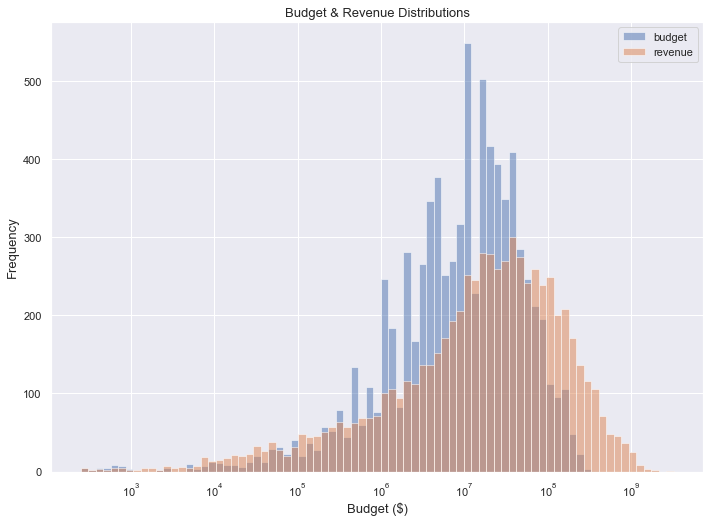

In [116]:
# there's a long tail in the distribution, so let's put it on a log scale instead
#log_binsize = 0.025
log_binsize = 0.09

budget_bins = 10 ** np.arange(2.4, np.log10(df['budget'].max())+log_binsize, log_binsize)
revenue_bins = 10 ** np.arange(2.4, np.log10(df['revenue'].max())+log_binsize, log_binsize)

#plt.figure(figsize=[8, 5])
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df, x = 'budget', bins = budget_bins,alpha=0.5)
plt.hist(data = df, x = 'revenue', bins = revenue_bins,alpha=0.5)

plt.xscale('log')
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
#plt.xticks([500, 10^3, 10^4, 10^5, 10^6, 10^8], [500, '1k', '10k', '1M', '10M', '10B'])

plt.xlabel('Budget ($)',fontsize=13)
plt.ylabel('Frequency',fontsize=13)

plt.title('Budget & Revenue Distributions',fontsize=13)
plt.legend(['budget','revenue'])
plt.show()

## Budget and Revenue Distributions.
**Both budget and revenue are skewed to the right, Most movies budget and revenue are higher than million dollar**

# What is the correlation and between Budget and Revenue?

## Correlation Between Budget and Revenue
**There's high and strong correlation between budget and revenue**

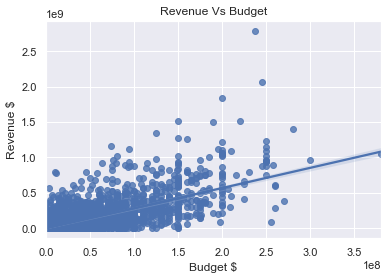

In [109]:
sns.regplot(data = df, x = 'budget', y = 'revenue')
plt.ylabel("Revenue $")
plt.xlabel("Budget $")
plt.title("Revenue Vs Budget");

**since there is a high correlation between budget and revenue, then I have more questions about it**



# What is Budget, Revenue and Profit Trend among years(1950-2018)?


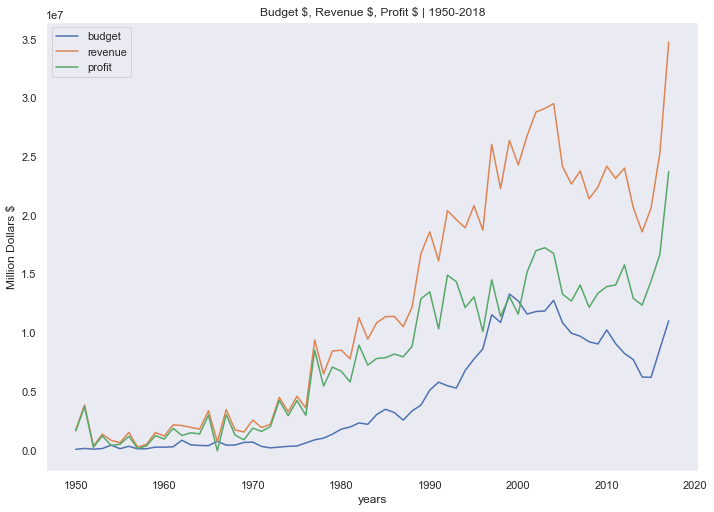

In [101]:
# Plotting budget and revenue among years from 1950 till 2018
#plt.figure(figsize=(10,6))
plt.figure(figsize=[ 11.69, 8.27])
df[(df['years'] < 2018) & (df['years'] >= 1950)].groupby(by = 'years').mean()['budget'].plot();
df[(df['years'] < 2018) & (df['years'] >= 1950)].groupby(by = 'years').mean()['revenue'].plot();
df[(df['years'] < 2018) & (df['years'] >= 1950)].groupby(by = 'years').mean()['profit'].plot();

plt.legend() 
#plt.yticks(np.arange(df.budget.min(), df.budget.max()+500000,500000),['0 M','0.5 M','1 M','1.5 M','2 M','2.5 M', '3 M','3.5 M'])
plt.ylabel("Million Dollars $")
plt.title("Budget $, Revenue $, Profit $ | 1950-2018");

## Budget, Revenue and Profit in (1950-2018)
**Remarkable upward trend in budget, revenue and profit among years. 
    revenue and profit are approximately identical in many years, but before 1980 profit started to be a lot less than revenue and that became obvious and increased among years.**

## Drama, Comedy, Action, Horror Movies Dataframe
**Here we subset our dataframe to work with the most common movies genres**

**We got 21405 rows in this new dataframe**

In [55]:
genres_df= df.query('genres==["Drama","Comedy","Action","Horror"]')
genres_df.shape

(21405, 19)

In [56]:
genres_df.status.value_counts()

Released           21289
Rumored               66
Post Production       36
In Production         10
Planned                4
Name: status, dtype: int64

# Multivariate Visualizations.

# What is the highest vote count and in which status and in which movie genre?


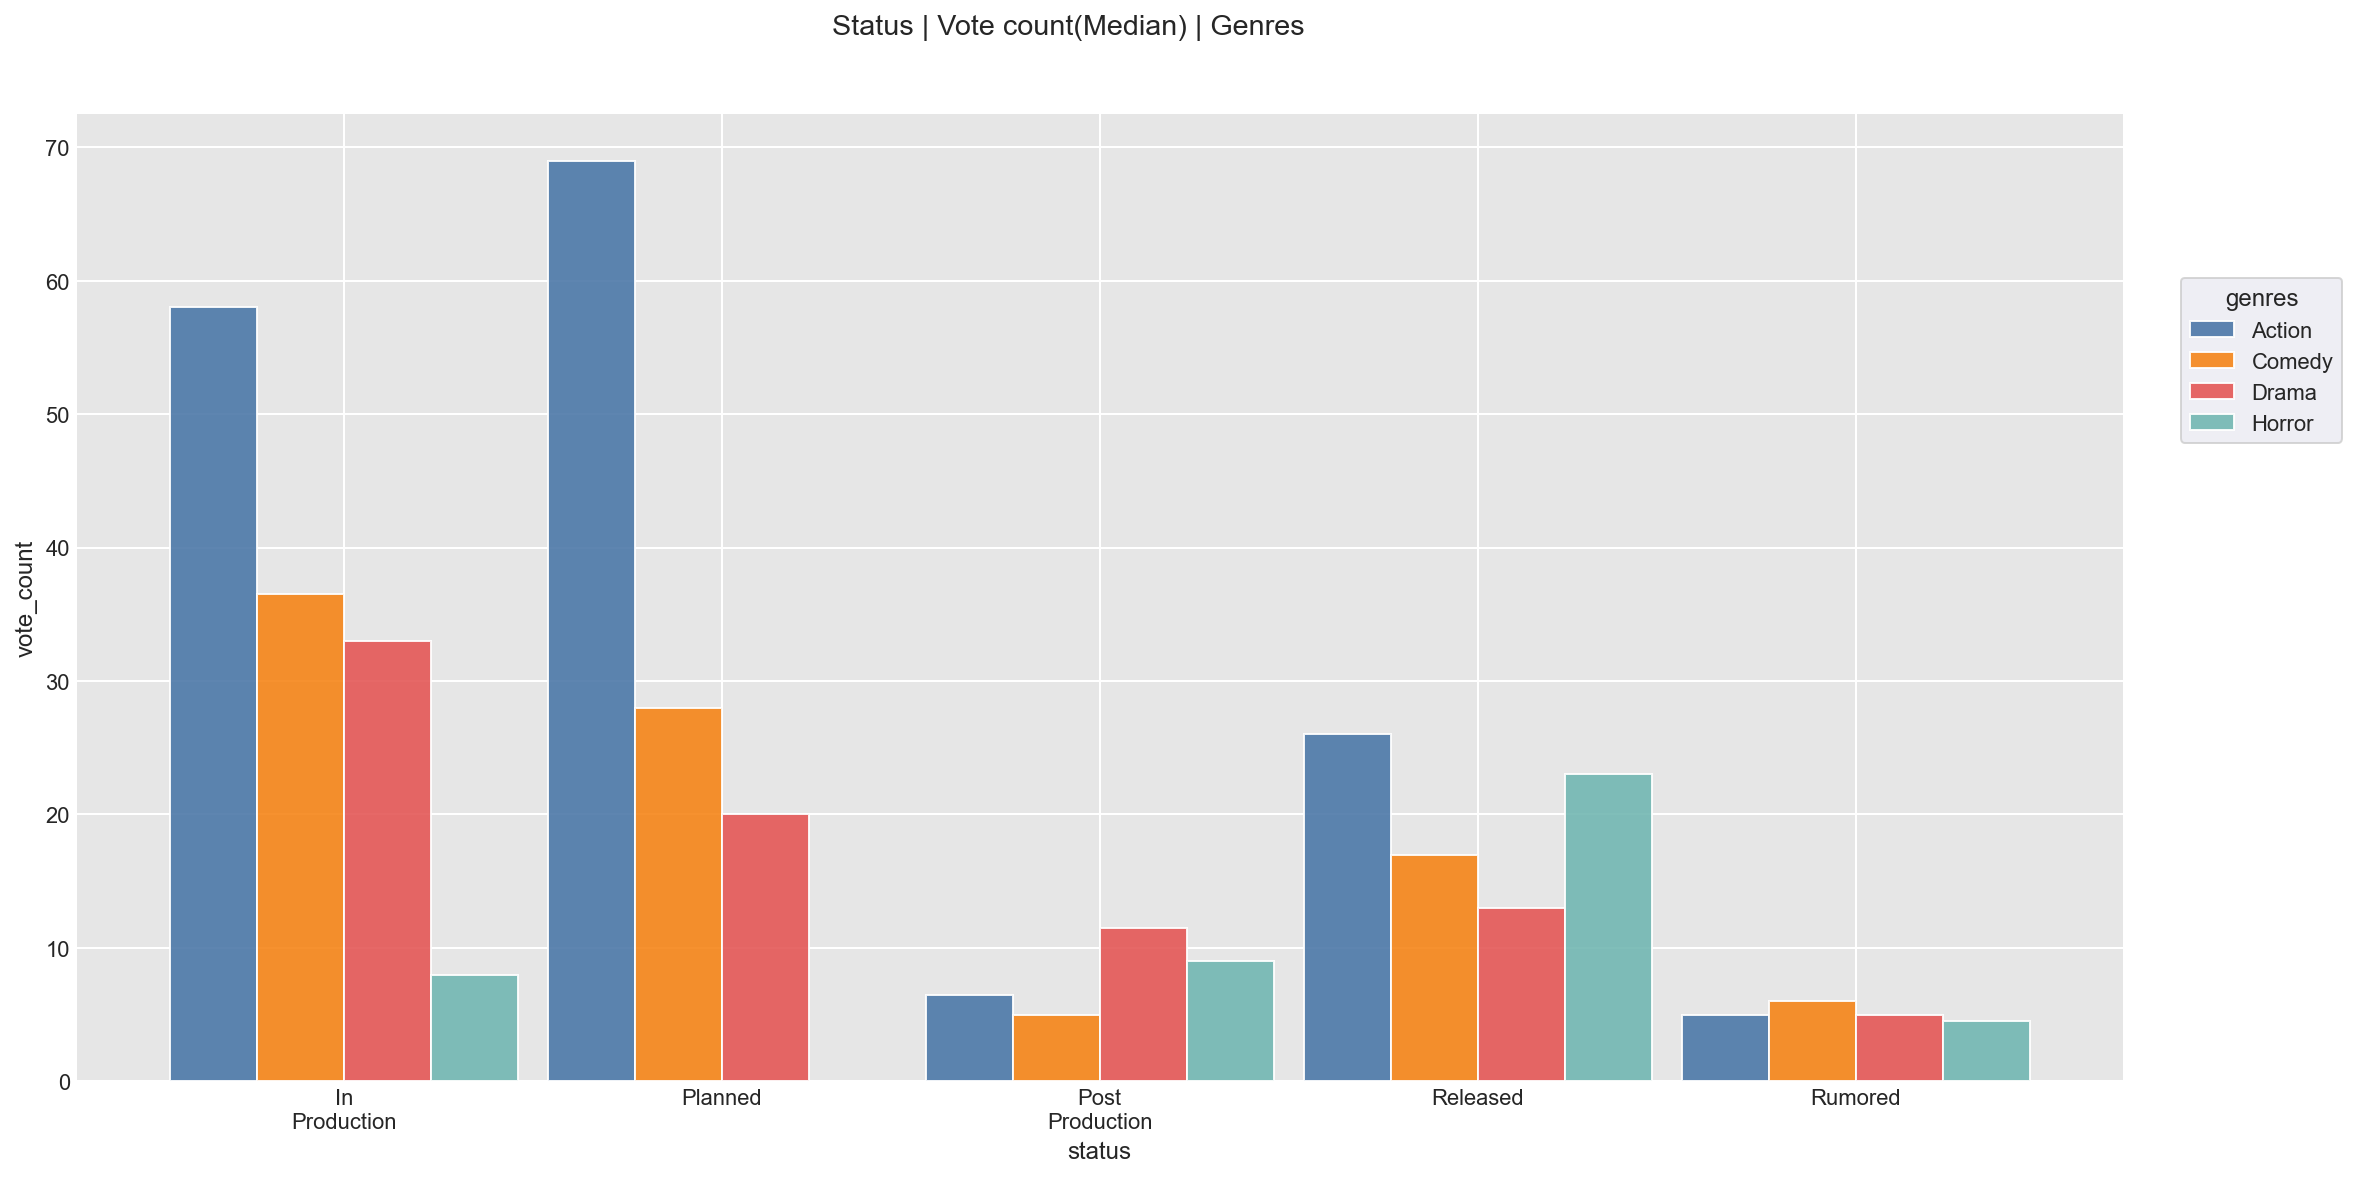

In [65]:
#Multivariate Visualization.
# Plotting status on x-axis and vote_count median on y-axis with genres as colored bars 
#plt.figure(figsize=(10,8))
dxp.bar(x='status',
        y='vote_count',
        data=genres_df,
        aggfunc='median',
        split='genres',
        title="Status | Vote count(Median) | Genres" ,
        figsize=(15,8))
#dxp.count(val='status', data=genres_df, split='genres',normalize='status')
#plt.yticks(np.arange(genres_df.status.value_counts().min(),genres_df.status.value_counts().max()+10 ,10));

- Lowest vote count is in Rumored status except Comdey movies, Comedy Movies vote count is lower in post production status.
- The highest movies with vote_count are Action Movies in Planned status.
- Planned status don't have Horror Movies!
- Action Movies have the highest vote count in Planned and In-Production and Released status among other movies genres.


# What is the highest Vote Average and in which status and in which movie genre?


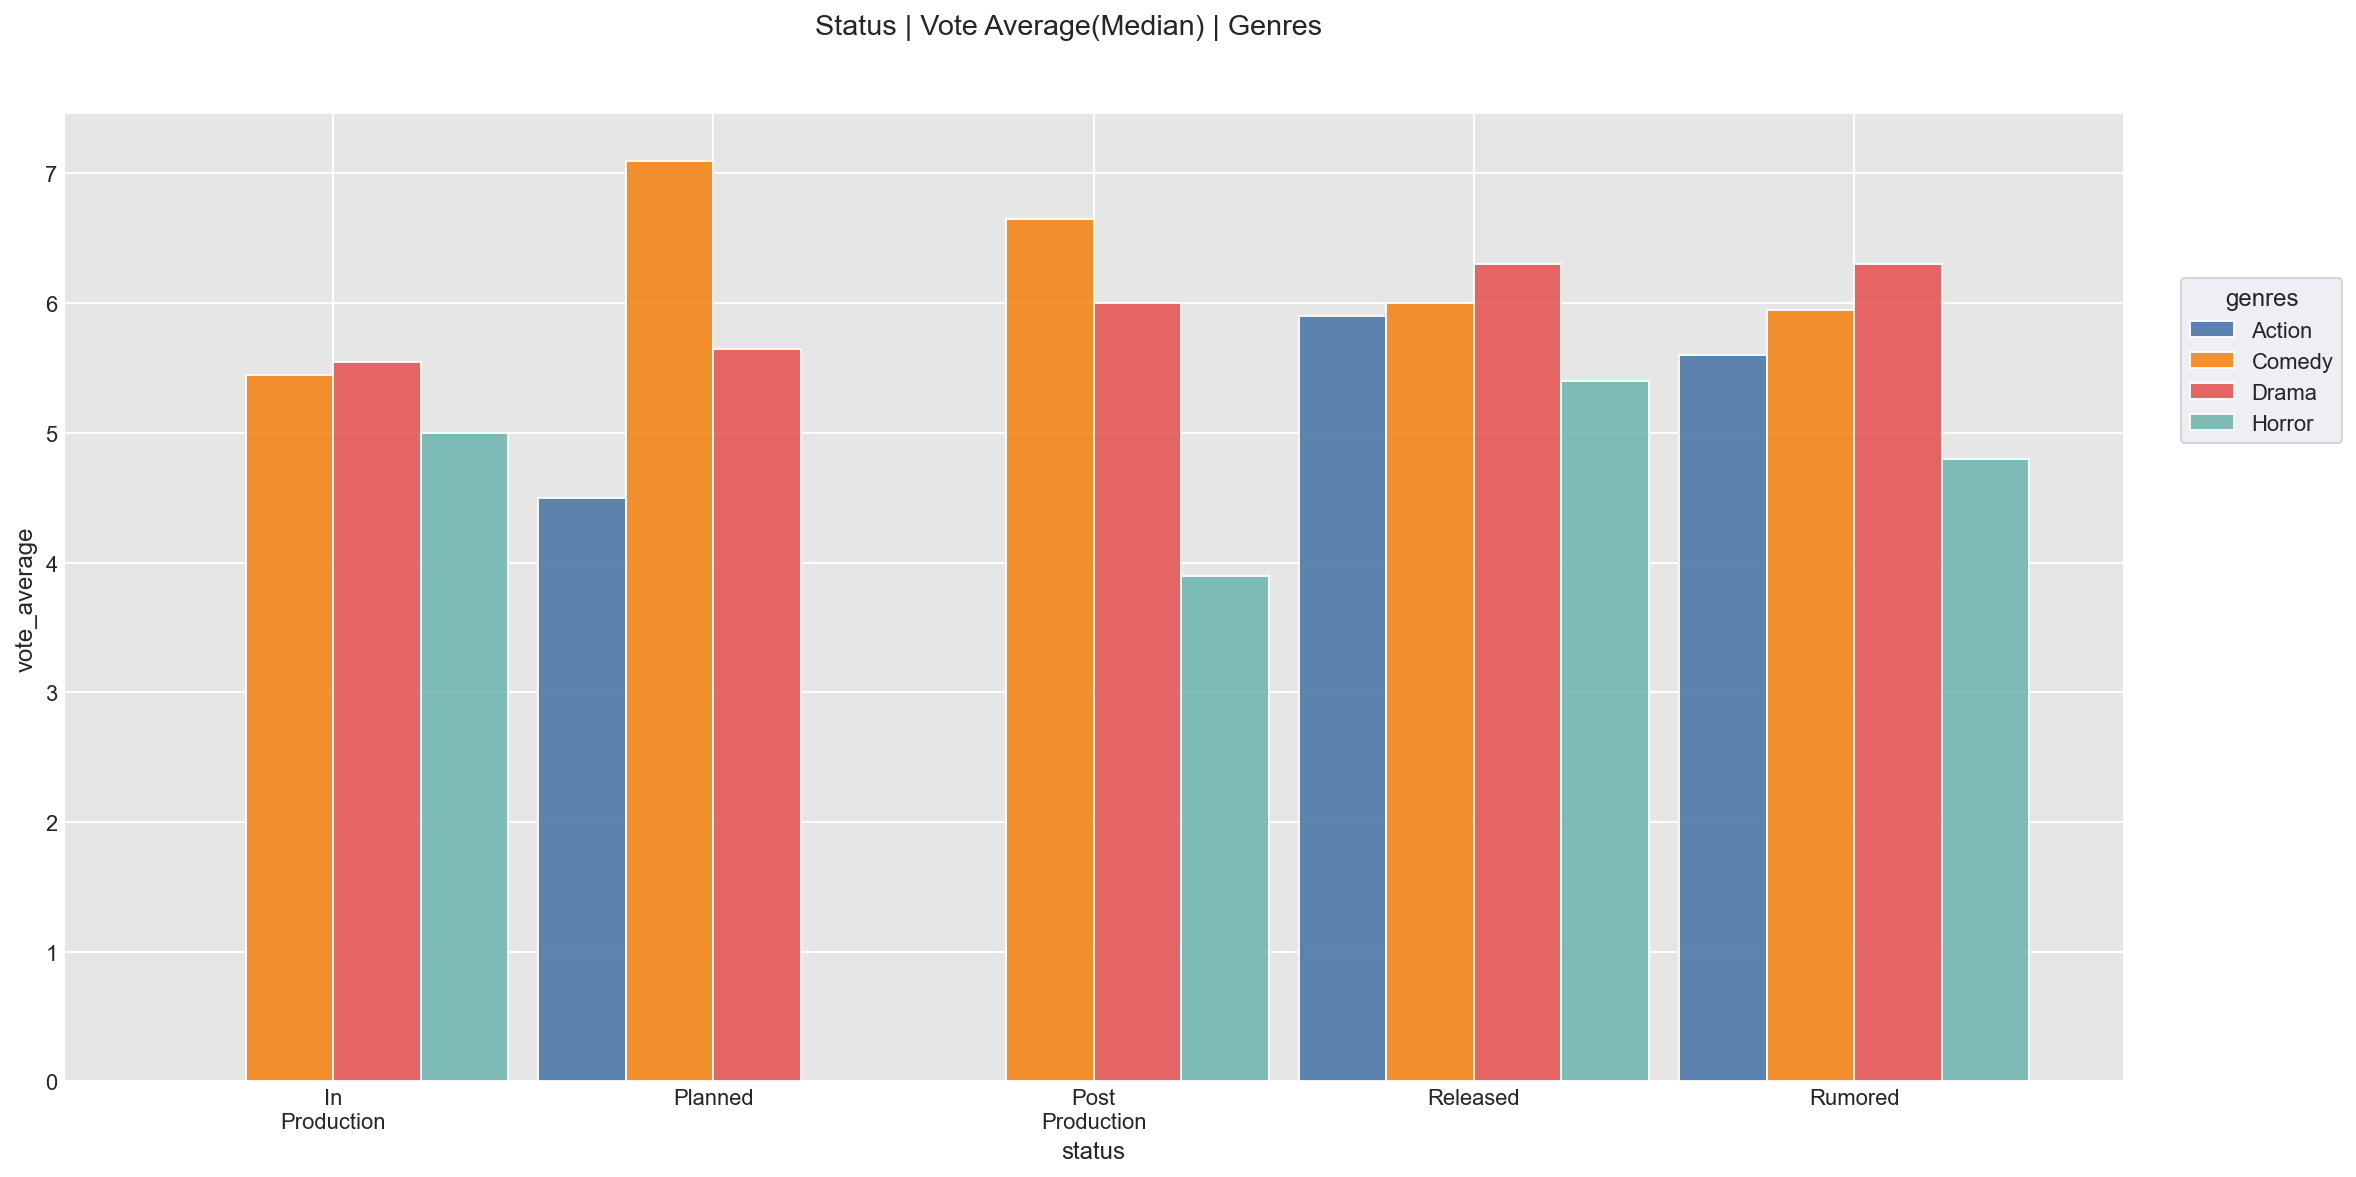

In [96]:
dxp.bar(x='status',
        y='vote_average',
        data=genres_df,
        aggfunc='median',
        split='genres',
        title="Status | Vote Average(Median) | Genres" ,
        figsize=(15,8)
       )
#plt.figure(figsize=[ 11.69, 8.27])

- Highest vote average are Comedy Movies in Planned status. (make sense to me)
- No Action Movies in In-production and Post Production statues.
- No Horror Movies in Planned status.
- The highest vote average in Released status are Drama Movies, then Comedy, Action and Horror Movies comes at the end of the list.

## Genres, Vote average Distributions and Status.
**We notice that Drama, Comedy and Action are the most movies with vote_average and most if not all movies are for all Released and tiny percentage are Rumored or in Post Production phase or in production or planned**

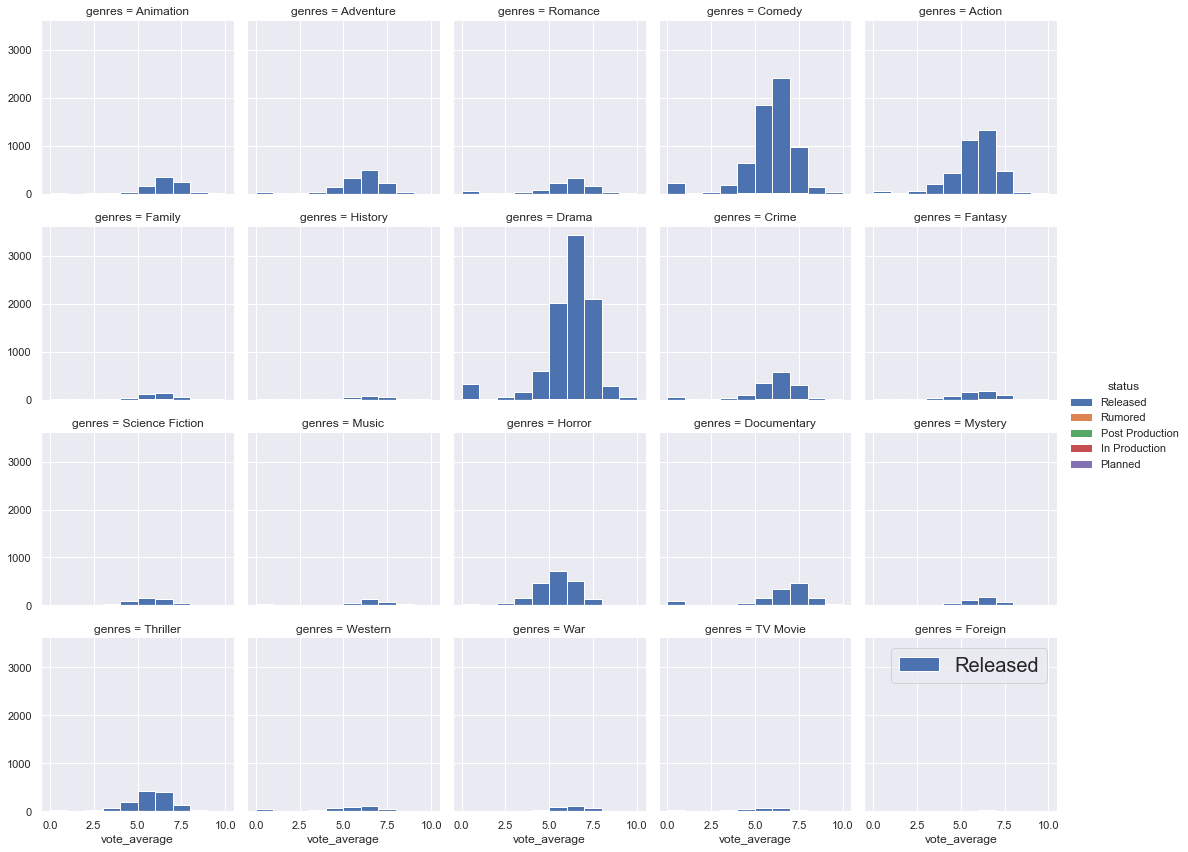

In [94]:
f1_year= sns.FacetGrid(data = df, col = 'genres',hue='status',col_wrap = 5)
f1_year.map(plt.hist, 'vote_average', bins=np.arange(0,10+1,1)).add_legend(); 
plt.legend(fontsize=20);

# Arabic Movies
**As an Arabic, Egyptian citizen I'm interested in arabic movies, so I filtered the dataset based on original language (ar), I know most of the Egyptian movies and these are some master pieces in the film making production history in Egypt**

- I got only 26 Arabic movies in the dataset, But I worked with it anyway. 

In [60]:
arabic_movies=df[df.original_language=='ar'].drop(42802) # Deleting Isralian movie cause there's no such a place. 
arabic_movies

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count,years,profit
125,False,0.0,Drama,44284,ar,صمت القصور,0.406754,Canal Horizons,Tunisia,1994-09-30,0.0,116.0,العربية,Released,False,4.3,3.0,1994,0.0
9104,False,0.0,Drama,37673,ar,المصير,0.395469,Ognon Pictures,Egypt,1997-05-09,0.0,135.0,العربية,Released,False,6.9,9.0,1997,0.0
12379,False,0.0,Drama,7973,ar,سكر بنات,4.882962,Bac Films,Lebanon,2007-07-01,0.0,96.0,Français,Released,False,6.8,53.0,2007,0.0
14646,False,0.0,Drama,44085,ar,عمارة يعقوبيان,0.719249,Good News,Egypt,2006-06-01,0.0,161.0,العربية,Released,False,6.8,14.0,2006,0.0
17145,False,0.0,Drama,56807,ar,Syn Babilonu,0.308648,UK Film Council,Iraq,2009-05-01,0.0,100.0,العربية,Released,False,7.7,6.0,2009,0.0
17563,False,0.0,Drama,47324,ar,باب الحديد,0.561462,Al-Ahramm Studios,Egypt,1958-07-31,0.0,77.0,العربية,Released,False,7.3,14.0,1958,0.0
18436,False,0.0,Drama,40939,ar,إسكندرية... ليه؟,0.036572,MISR International Films,Egypt,1979-10-06,0.0,133.0,العربية,Released,False,5.0,1.0,1979,0.0
18803,False,0.0,Drama,178535,ar,المخدوعون,0.016023,National Film Organization,Syrian Arab Republic,1973-07-01,0.0,107.0,العربية,Released,False,7.5,2.0,1973,0.0
20533,False,0.0,Drama,129112,ar,وجدة‎‎,5.451273,Razor Film Produktion GmbH,Saudi Arabia,2012-08-31,1347747.0,98.0,العربية,Released,False,7.2,125.0,2012,1347747.0
22536,False,0.0,Documentary,159037,ar,The Square,4.689168,Roast Beef Productions,United Kingdom,2013-06-07,0.0,88.0,العربية,Released,False,7.8,56.0,2013,0.0


In [61]:
arabic_movies.production_countries.value_counts()

Egypt                     9
Palestinian Territory     3
Lebanon                   3
Morocco                   2
United Kingdom            2
Tunisia                   1
Syrian Arab Republic      1
Libyan Arab Jamahiriya    1
United Arab Emirates      1
Jordan                    1
Saudi Arabia              1
Iraq                      1
Name: production_countries, dtype: int64

# What is the most productive Arabic country ? (Most frequent country)
# What is the country of the highest vote count in Arabic countries?
# What is the country of the highest vote Average in Arabic countries?


<Figure size 841.68x595.44 with 0 Axes>

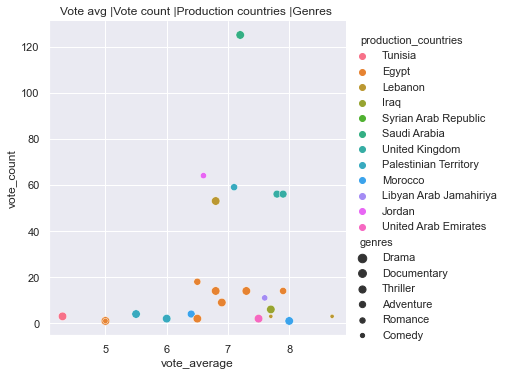

In [91]:
plt.figure(figsize=[ 11.69, 8.27]);
sns.relplot(x="vote_average", y="vote_count", size="genres",hue="production_countries", data=arabic_movies);
sns.set(rc={'figure.figsize':(15,8.27)})
plt.title("Vote avg |Vote count |Production countries |Genres ");

### Egypt ( My country YAY ) is the most productive country in this subset 

**Seems like Egypt and Lebanon are the most two productive countries which their movies original language is Arabic **

- Wow! There were some British production companies produced Arabic Movies
- the highest vote average among Arabic movies goes to a Lebanon movie (Comedy Movie)
- the highest vote count among Arabic movies goes to Saudi Arabian movie (Drama)

# Key insights:

- Most of Movies in the Dataset are Released, We have so much less info about other movies in other phases of production.

- Most common movies genres are Drama, Comedy, Action and Horror, it was surprising to me that Animation movies isn't that popular !

- Comedy movies are highly voted, but in Released phase Drama movies got  the highest vote average.

- US has the biggest numbers of production companies and number of movies produced.

- Having a lot of production companies in one country doesn't mean it has a lot of movies being produced, as we saw with Japan and Spain.

- There is a high correlation in Budget, Revenue, and profit. "if u spend a lot u will gain a lot"

- Budget and Revenue and Profit all have an upward trend among years, seems like production companies put a lot of money in Movies industry and it is getting bigger through years

### Arabic Movies insights:
  - Surprisingly! some Arabic Movies are produced by British companies.
  - Egypt is the most producing Arabic country for movies in this Dataset. 